In [ ]:
pip install numpy pandas scikit-learn seaborn matplotlib nltk


In [ ]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (if not done before)
nltk.download('stopwords')
nltk.download('punkt')


In [49]:
# Load dataset
df = pd.read_csv("C:\\Users\\Anil Rathod\\Desktop\\LP III\\ML\\Pract - 2\\spam_ham_dataset.csv")

print("Dataset loaded. First few rows:")
print(df.head())


Dataset loaded. First few rows:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [50]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

# Display updated DataFrame
print("Data after preprocessing:")
print(df.head())


Data after preprocessing:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num                                     processed_text  
0          0  subject enron methanol meter 988291 this is a ...  
1          0  subject hpl nom for january 9 2001 see attache...  
2          0  subject neon retreat ho ho ho we re around to ...  
3          1  subject photoshop windows office cheap main tr...  
4          0  subject re indian springs this deal is to book...  


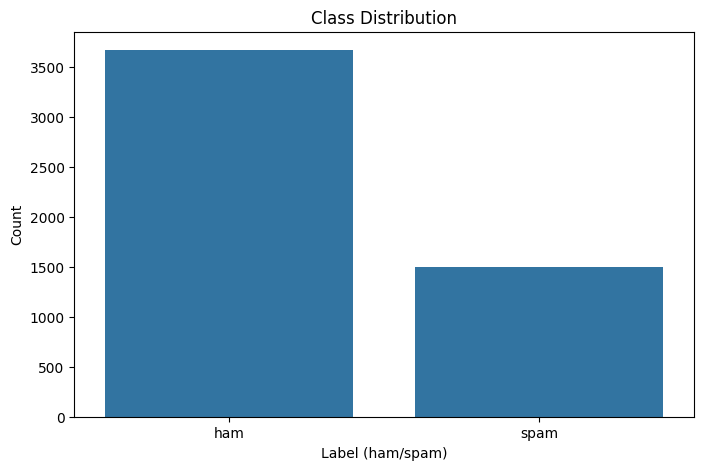

Class distribution:
label
ham     3672
spam    1499
Name: count, dtype: int64


In [51]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label (ham/spam)')
plt.ylabel('Count')
plt.show()

# Show class distribution
print("Class distribution:")
print(df['label'].value_counts())


In [52]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

df['cleaned_text'] = df['processed_text'].apply(remove_stopwords)

# Display cleaned DataFrame
print("Data after removing stopwords:")
print(df[['processed_text', 'cleaned_text']].head())


Data after removing stopwords:
                                      processed_text  \
0  subject enron methanol meter 988291 this is a ...   
1  subject hpl nom for january 9 2001 see attache...   
2  subject neon retreat ho ho ho we re around to ...   
3  subject photoshop windows office cheap main tr...   
4  subject re indian springs this deal is to book...   

                                        cleaned_text  
0  subject enron methanol meter 988291 follow not...  
1  subject hpl nom january 9 2001 see attached fi...  
2  subject neon retreat ho ho ho around wonderful...  
3  subject photoshop windows office cheap main tr...  
4  subject indian springs deal book teco pvr reve...  


In [54]:
# Split data into training and testing sets
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [55]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [56]:
# Make predictions
y_pred = model.predict(X_test_vectorized)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[729  13]
 [ 15 278]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



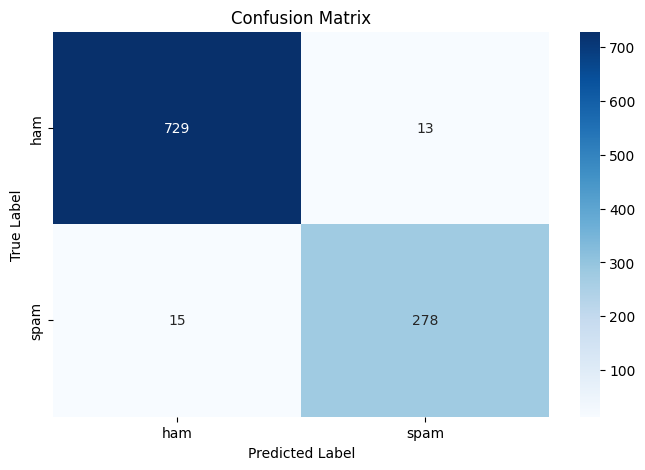

In [57]:
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\Anil
[nltk_data]     Rathod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anil
[nltk_data]     Rathod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.73      0.84       742
        spam       0.58      0.97      0.73       293

    accuracy                           0.80      1035
   macro avg       0.78      0.85      0.78      1035
weighted avg       0.87      0.80      0.81      1035


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       742
        spam       0.93      0.97      0.95       293

    accuracy                           0.97      1035
  

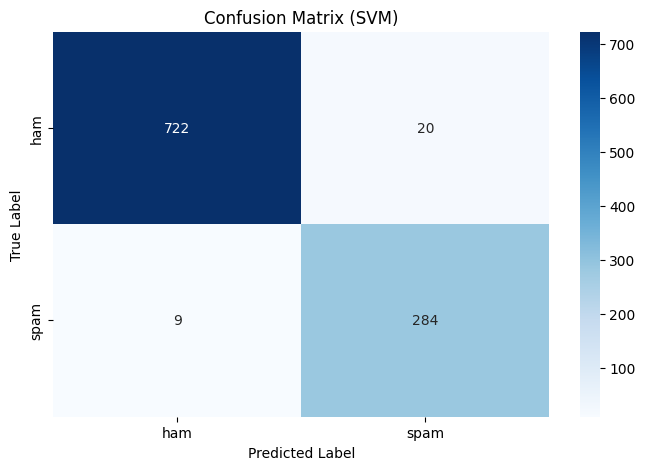

In [1]:
# Install required packages
!pip install numpy pandas scikit-learn seaborn matplotlib nltk

# Import necessary libraries
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (if not done before)
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
df = pd.read_csv("C:\\Users\\Anil Rathod\\Desktop\\LP III\\ML\\Pract - 2\\spam_ham_dataset.csv")

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

df['cleaned_text'] = df['processed_text'].apply(remove_stopwords)

# Split data into training and testing sets
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
y_pred_nb = nb_model.predict(X_test_vectorized)

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectorized, y_train)
y_pred_knn = knn_model.predict(X_test_vectorized)

# Support Vector Machine Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectorized, y_train)
y_pred_svm = svm_model.predict(X_test_vectorized)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix Visualization for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
